In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('PUBG.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### Question-1: To find the Kills by an average person

In [8]:
print(f"Mean: {df['kills'].mean()}")
print(f"80%: {df['kills'].quantile(0.8)}")
print(f"Max: {df['kills'].max()}")

Mean: 0.9247833241810259
80%: 2.0
Max: 72


### Question-2: Visualize the kill count

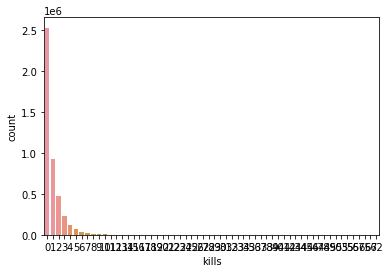

In [10]:
sns.countplot(df['kills'])
plt.show()

In [22]:
pubg_copy = df.copy()
pubg_copy.loc[pubg_copy['kills'] > pubg_copy['kills'].quantile(0.99)] = "8+"

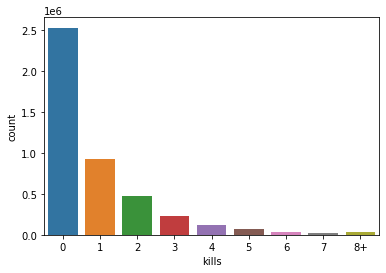

In [24]:
sns.countplot(pubg_copy['kills'].astype('str').sort_values())
plt.show()

### Question-3: Group the players based on their number of kills and note down the Inference

In [25]:
df.groupby(['kills'])['Id'].count().sort_values(ascending=False).head()

kills
0    2529722
1     928079
2     472466
3     232441
4     124543
Name: Id, dtype: int64

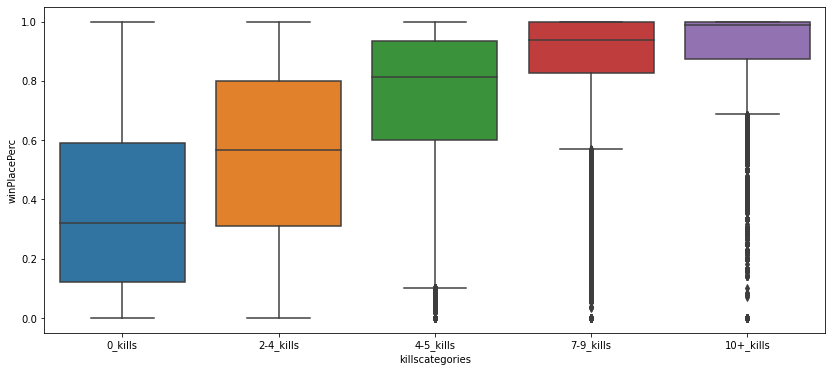

In [27]:
pubg = df.copy()
pubg['killscategories'] = pd.cut(df['kills'],[-1,0,2,5,10,60],labels=['0_kills','2-4_kills','4-5_kills','7-9_kills','10+_kills'])
plt.figure(figsize=(14,6))
sns.boxplot(x="killscategories", y="winPlacePerc", data=pubg)
plt.show()

### Question-4: Is walking distance of an average person is correlated with the winning percentage? write your inference

In [30]:
sns.displot(df['walkDistance'].head(),df['winPlacePerc'].head())

TypeError: displot() takes from 0 to 1 positional arguments but 2 were given

In [35]:
df['walkDistance'].mean(),df['walkDistance'].min(),df['walkDistance'].max(),df['walkDistance'].quantiletile(0.99)

(1154.217859096256, 0.0, 25780.0, 4396.0)

In [36]:
pubg = df[df['walkDistance'] < df['walkDistance'].quantile(0.99)]

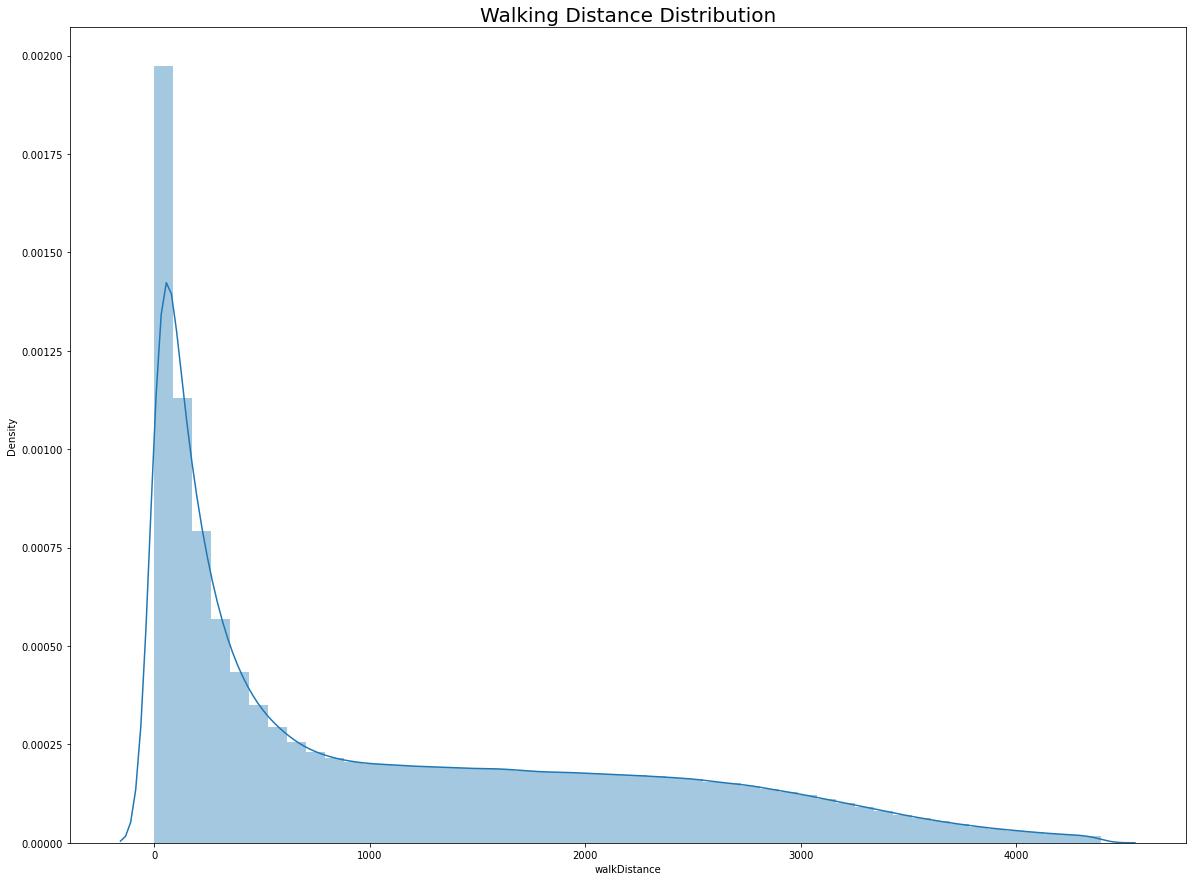

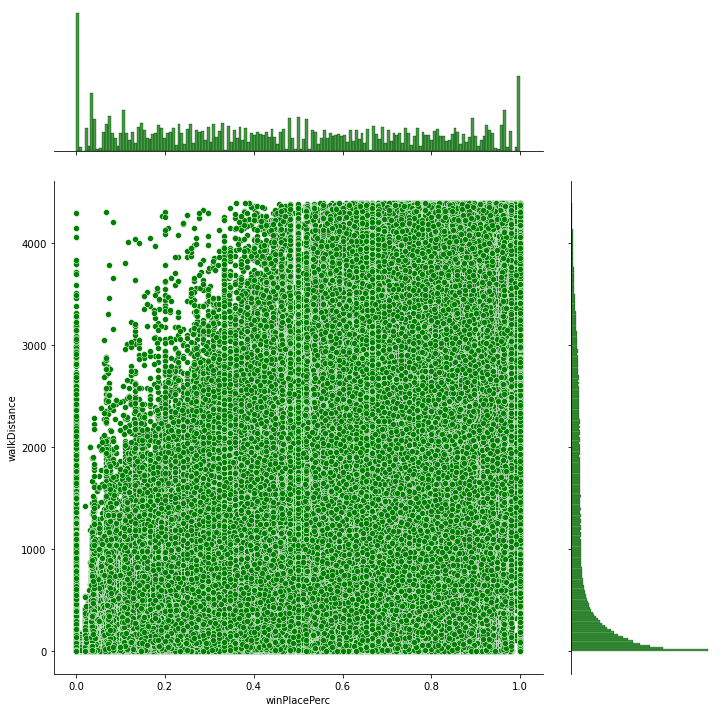

In [38]:
plt.figure(figsize=(20,15))
plt.title('Walking Distance Distribution', fontsize=20)
sns.distplot(pubg['walkDistance'])
plt.show()
sns.jointplot(x='winPlacePerc',y='walkDistance',data=pubg, height=10, ratio=3, color='green')
plt.show()

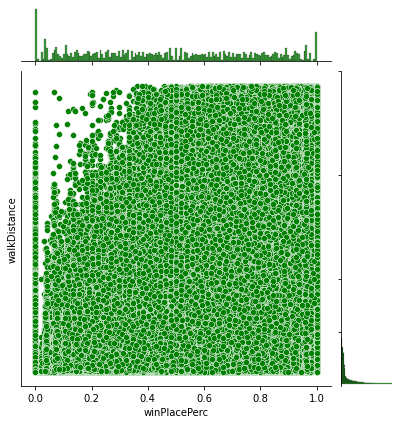

In [42]:
sns.jointplot(x='winPlacePerc',y='walkDistance',data=pubg, color='green')
plt.yticks([5000,10000,20000,30000])
plt.show()

### Question-5: Will destroying a vehicle increase one's winning percentage?Write your inference through visual observation

In [43]:
df['vehicleDestroys'].mean(), df['vehicleDestroys'].quantile(.80), df['vehicleDestroys'].max()

(0.00791820760491535, 0.0, 5)

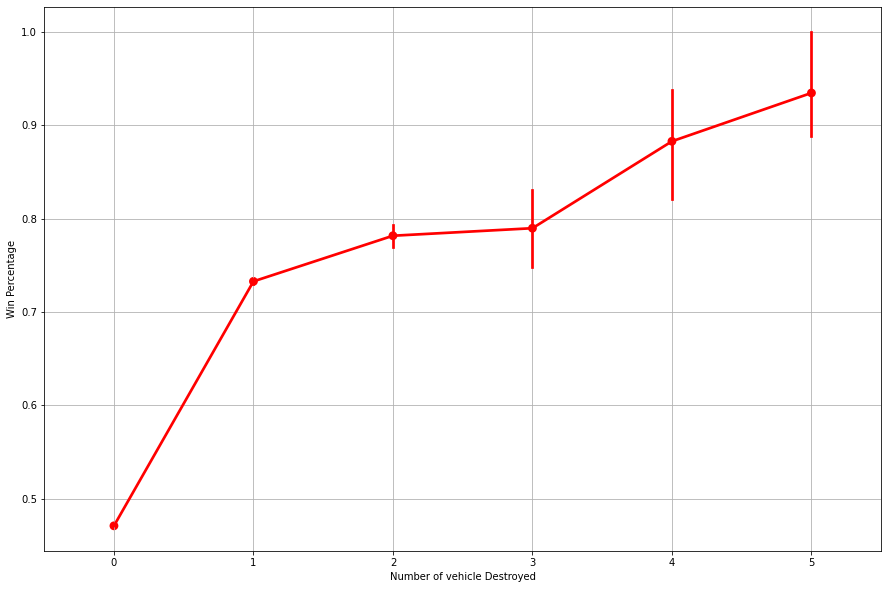

In [45]:
plt.figure(figsize=(15,10))
sns.pointplot(y='winPlacePerc',x='vehicleDestroys',data=df, color='red', alpha=0.8)
plt.xlabel('Number of vehicle Destroyed')
plt.ylabel('Win Percentage')
plt.grid()
plt.show()

### Question-6: Determine the Usage of healing and boosting of a person and visualize its trend

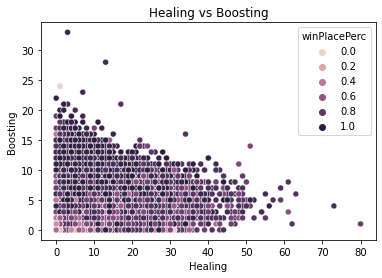

In [50]:
sns.scatterplot(x='heals',y='boosts', data=df')
plt.xlabel('Healing')
plt.ylabel('Boosting')
plt.title('Healing vs Boosting')
plt.show()

In [55]:
#Heals
print(f"Mean: {df['heals'].mean()}, 90%: {df['heals'].quantile(.90)}, Max: {df['heals'].max()}")
#Boosts
print(f"Mean: {df['boosts'].mean()}, 90%: {df['boosts'].quantile(.90)}, Max: {df['boosts'].max()}")

Mean: 1.370147196987789, 90%: 5.0, Max: 80
Mean: 1.1069077209045448, 90%: 4.0, Max: 33


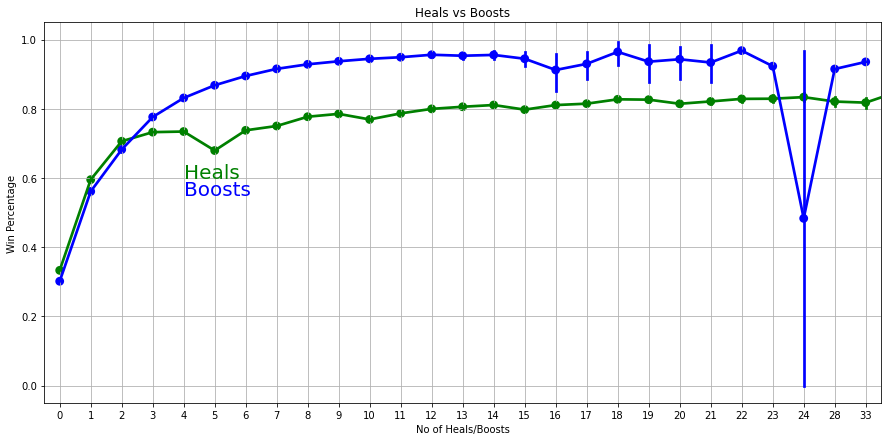

In [67]:
f,ax1 = plt.subplots(figsize =(15,7))
sns.pointplot(y='winPlacePerc',x='heals',data=df, alpha=0.8, color='green')
sns.pointplot(y='winPlacePerc',x='boosts',data=df, alpha=0.8, color='blue')
plt.text(4,0.6,'Heals',color='green',fontsize = 20,style = 'normal')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 20,style = 'normal')
plt.ylabel('Win Percentage')
plt.xlabel('No of Heals/Boosts')
plt.title('Heals vs Boosts')
plt.grid()
plt.show()

### Question-7: Visualize to observe the pattern in killing of solo, duo and group

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [71]:
solo = df[df['numGroups']>50]
duo = df[(df['numGroups']>25) & (df['numGroups']<=50)]
squads = df[df['numGroups']<=25]
print("There are {} ({:.3f}%) solo games, {} ({:.3f}%) duo games and {} ({:.3f}%) squad games".format(len(solo), \
100*len(solo)/len(df), len(duo), 100*len(duo)/len(df), len(squads), 100*len(squads)/len(df)))

There are 709111 (15.946%) solo games, 3295326 (74.103%) duo games and 442529 (9.951%) squad games


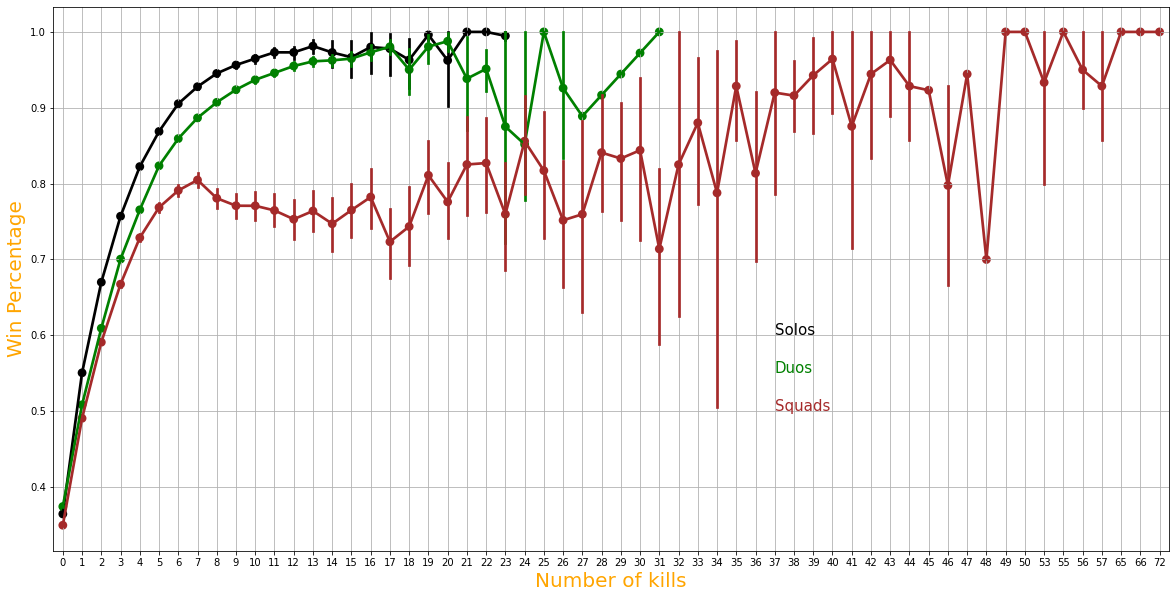

In [74]:
plt.subplots(figsize=(20,10))
sns.pointplot(x='kills', y='winPlacePerc', data=solo, color='black', alpha=0.8)
sns.pointplot(x='kills', y='winPlacePerc', data=duo, color='green', alpha=0.8)
sns.pointplot(x='kills', y='winPlacePerc', data=squads, color='brown', alpha=0.8)
plt.text(37,0.6, 'Solos',color='black', fontsize=15, style='normal')
plt.text(37,0.55, 'Duos',color='green', fontsize=15, style='normal')
plt.text(37,0.5, 'Squads',color='brown', fontsize=15, style='normal')
plt.xlabel('Number of kills', fontsize=20, color='orange')
plt.ylabel('Win Percentage', fontsize=20, color='orange')
plt.grid()
plt.show()

### Question-8: Visualize to find the highest postive and negative correlation with the target (Winplaceperc).Also visualize top-7 most positive correlated variables with the target

In [76]:
correlation = df.corr()
correlation

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,-0.810516,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490143,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023277,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [81]:
correlation['winPlacePerc'].sort_values(ascending=False).head(8)

winPlacePerc       1.000000
walkDistance       0.810888
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
Name: winPlacePerc, dtype: float64

In [ ]:
k=7
f, ax = plt.subplots(figsize=(11,11))
cols = df.corr().nlargest(k, 'winPlacPerc')['winPlacPerc'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values)